In [2]:
'''
Linear Regression: To predict scores for optimal curve fitting iterations.
dataset: Cardekho car pricing
purpose: predict car prices, factoring age and other important features.
DS source: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho/tasks?taskId=1420
'''
##############################
# Author: AP
# Imports below
##############################


from sklearn import datasets,linear_model
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as ny
import pandas as ps
import seaborn as sn

%matplotlib inline

# Step 1: Loading and examining data set

In [3]:

# How does the data look like ?

cardf = ps.read_csv(r"C:\Users\140115\PycharmProjects\MachLearn2021\datasets\Car_details_v3.csv")
#cardf.head()

print(cardf.shape, cardf.columns)

print("\n ******************************* \n ")

print(cardf.describe(), cardf.info())

print("\n ******************************* \n ")

print(cardf.isna().sum()) # Has about 220 null valued rows.

cardf1 = cardf.dropna(axis=0) # dropping them

print(cardf1.shape)

(8128, 13) Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

 ******************************* 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
name             8128 non-null object
year             8128 non-null int64
selling_price    8128 non-null int64
km_driven        8128 non-null int64
fuel             8128 non-null object
seller_type      8128 non-null object
transmission     8128 non-null object
owner            8128 non-null object
mileage          7907 non-null object
engine           7907 non-null object
max_power        7913 non-null object
torque           7906 non-null object
seats            7907 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.

In [4]:
# Checking columns for categorical values that need conversion.

cardf1.head(10)

cardf1 = cardf1.drop_duplicates()

# Transmission, Fuel type, Owner need numerical conversion.
# seller type, engine, torque, name and max power can be dropped ? The others can be encoded.

In [13]:
cardf2 = cardf1.drop(columns=['seller_type','name','torque','max_power','mileage','seats','engine'],axis=1)

print("\n ******************************* \n ")

#converting year to age against 2021
cardf2['age'] = 2021 - cardf2['year']

cardf2.head(10)


 ******************************* 
 


,year,selling_price,km_driven,fuel,transmission,owner,age
0,2014,450000,145500,Diesel,Manual,First Owner,7
1,2014,370000,120000,Diesel,Manual,Second Owner,7
2,2006,158000,140000,Petrol,Manual,Third Owner,15
3,2010,225000,127000,Diesel,Manual,First Owner,11
4,2007,130000,120000,Petrol,Manual,First Owner,14
5,2017,440000,45000,Petrol,Manual,First Owner,4
6,2007,96000,175000,LPG,Manual,First Owner,14
7,2001,45000,5000,Petrol,Manual,Second Owner,20
8,2011,350000,90000,Diesel,Manual,First Owner,10
9,2013,200000,169000,Diesel,Manual,First Owner,8


In [18]:

# Getting dummies/ encoded features


cardf3 = ps.get_dummies(cardf2,drop_first=True)
cardf3.drop(columns=['fuel_LPG','owner_Fourth & Above Owner'])
cardf3.head(10)

,year,selling_price,km_driven,age,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,7,1,0,0,1,0,0,0,0
1,2014,370000,120000,7,1,0,0,1,0,1,0,0
2,2006,158000,140000,15,0,0,1,1,0,0,0,1
3,2010,225000,127000,11,1,0,0,1,0,0,0,0
4,2007,130000,120000,14,0,0,1,1,0,0,0,0
5,2017,440000,45000,4,0,0,1,1,0,0,0,0
6,2007,96000,175000,14,0,1,0,1,0,0,0,0
7,2001,45000,5000,20,0,0,1,1,0,1,0,0
8,2011,350000,90000,10,1,0,0,1,0,0,0,0
9,2013,200000,169000,8,1,0,0,1,0,0,0,0


In [19]:
# Correlation within the dataset. Factors governing prices vs columnar values

#plt.figure(figsize=(30,30))
#plt.rcParams.update({'font.size': 22})
#sn.heatmap(cardf3.corr(),annot=True)


In [20]:

# T-T-S

from sklearn.model_selection import train_test_split as tetras

X = cardf3.drop(columns=['selling_price'])
y = cardf3['selling_price']

X_train,X_test,y_train,y_test = tetras(X,y,train_size=0.8,random_state=42) #omitting random state for now.

print(X_train.shape, X_test.shape)

print("\n ******************************* \n ")

print(X_train.head())


(5373, 11) (1344, 11)

 ******************************* 
 
      year  km_driven  age  fuel_Diesel  fuel_LPG  fuel_Petrol  \
2583  2014      80000    7            0         0            1   
1428  2017      35000    4            1         0            0   
7288  2013      64000    8            1         0            0   
6851  2018      25000    3            1         0            0   
4447  2013      90000    8            1         0            0   

      transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
2583                    1                           0                   0   
1428                    1                           0                   0   
7288                    0                           0                   0   
6851                    1                           0                   0   
4447                    1                           0                   0   

      owner_Test Drive Car  owner_Third Owner  
2583                     0       

In [21]:
# Fitting the model with above state
from sklearn.linear_model import LinearRegression

car_reg_model = LinearRegression()
car_reg_model.fit(X_train,y_train)

LinearRegression()

In [27]:
curr_set = [2014,80000,7,0,0,1,1,0,0,0,0]
print(car_reg_model.predict([curr_set]))

pred_set = car_reg_model.predict(X_test)
print("\n R2 score is : ",car_reg_model.score(X_test,y_test))

from sklearn.metrics import mean_squared_error

rmse = ny.sqrt(mean_squared_error(y_test, pred_set))

print("\n Root Mean Squared Error: {}".format(rmse))

print("\n RSME is : ",car_reg_model.score(X_test,y_test))

[346982.71373926]

 R2 score is :  0.3848034245426065

 Root Mean Squared Error: 367414.0187963752

 RSME is :  0.3848034245426065


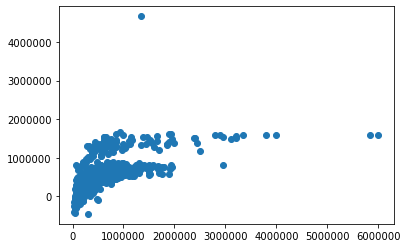

In [25]:
plt.scatter(y_test,pred_set)

#  So far, prediction score, rsme and R2 being low. To do: Need a better pre-processing, cleaning and Feature engineering.
